In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion, ProteinWeights, CombinedSpectra



['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../']


/usr/local/lib/python3.6/dist-packages/numba/core/errors.py:144: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1

In [2]:
! ls /mnt/d/dev/data/msi/190724_AR_ZT1_Proteins

190724_AR_ZT1_Proteins.bak
190724_AR_ZT1_Proteins.d
190724_AR_ZT1_Proteins.mis
190724_AR_ZT1_Proteins.tif
190724_AR_ZT1_Proteins_0000.tif
190724_AR_ZT1_Proteins_0001.tif
190724_AR_ZT1_Proteins_Plot.jpg
190724_AR_ZT1_Proteins_Regions.xml
190724_AR_ZT1_Proteins_info.txt
190724_AR_ZT1_Proteins_poslog.txt
190724_AR_ZT1_Proteins_spectra.ibd
190724_AR_ZT1_Proteins_spectra.imzML
190724_AR_ZT1_Proteins_spectra.imzML.regions
adata.hdr
adata.t2m
spots.txt


In [3]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/190724_AR_ZT1_Proteins/190724_AR_ZT1_Proteins_spectra.imzML")

Opening regions file for /mnt/d/dev/data/msi/190724_AR_ZT1_Proteins/190724_AR_ZT1_Proteins_spectra.imzML


0 1020 1077 307 416
1 1298 1357 323 418
2 690 747 315 416
3 353 429 290 411


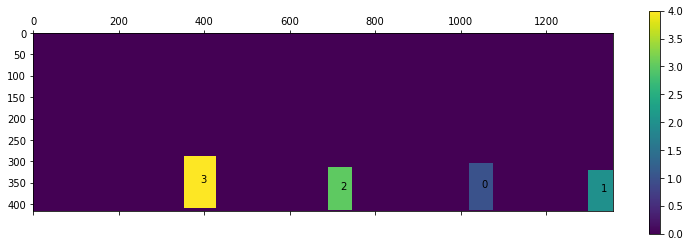

In [4]:
imze.list_regions()

In [6]:
spectra_orig = imze.get_region_array(2, makeNullLine=True)
spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")

Found region 2 with shape (58, 102, 17900)
I0625 09:37:05.998256 139671011854144 segment.py:2227] Found region 2 with shape (58, 102, 17900)


In [7]:
spectra_orig = imze.get_region_array(2, makeNullLine=False)

Found region 2 with shape (58, 102, 17900)
I0625 09:38:00.363126 139671011854144 segment.py:2227] Found region 2 with shape (58, 102, 17900)


4971.776527185408 1
5716.153065673792 1
6226.496412548183 2
6228.0063041069825 4
6229.516195665783 15
6231.026087224583 15
6232.535978783382 85
6234.045870342183 183
6235.555761900983 327
6237.065653459783 353
6238.5755450185825 93
6240.085436577383 1
6277.832725547381 6
6280.852508664982 6
6282.362400223781 9
6283.872291782582 26
6285.382183341382 23
6286.892074900182 26
6288.401966458981 10
6289.911858017782 2
6291.4217495765815 1
6647.756157453375 1
6649.266049012174 9
6650.775940570975 41
6652.2858321297745 20
6653.795723688574 52
6655.305615247375 59
6656.815506806175 172
6658.325398364974 792
6659.835289923774 1821
6661.345181482575 1070
6662.855073041374 652
6664.364964600174 30
8436.97765463134 1
12149.800997720467 2
12152.820780838067 2
12154.330672396867 3


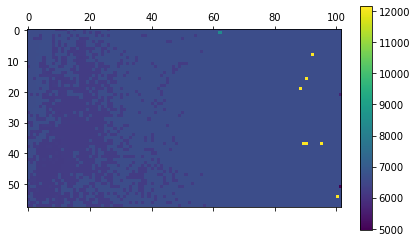

5916 14.950656377960454 74.2484203426622 37.91779273550781


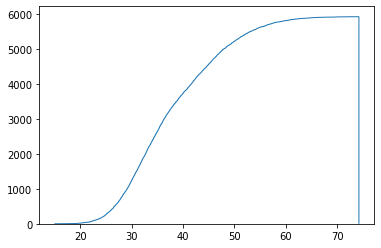

In [8]:
imze.list_highest_peaks(spectra, counter=True)

In [9]:
spec = SpectraRegion(spectra, imze.mzValues)

2020-06-25 09:38:07,236  SpectraRegion  INFO: Processing Mass 6237 with best existing mass 6237.065653459783
I0625 09:38:07.236258 139671011854144 segment.py:399] Processing Mass 6237 with best existing mass 6237.065653459783


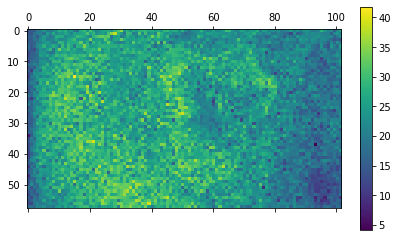

In [10]:
spec.mass_heatmap(6237)

2020-06-25 09:38:28,175  SpectraRegion  INFO: Processing Mass 6240 with best existing mass 6240.085436577383
I0625 09:38:28.175844 139671011854144 segment.py:399] Processing Mass 6240 with best existing mass 6240.085436577383


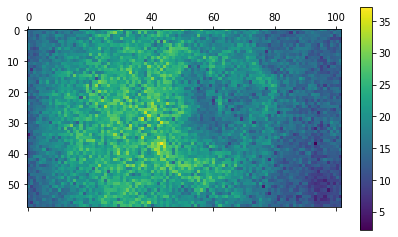

In [13]:
spec.mass_heatmap(6240)

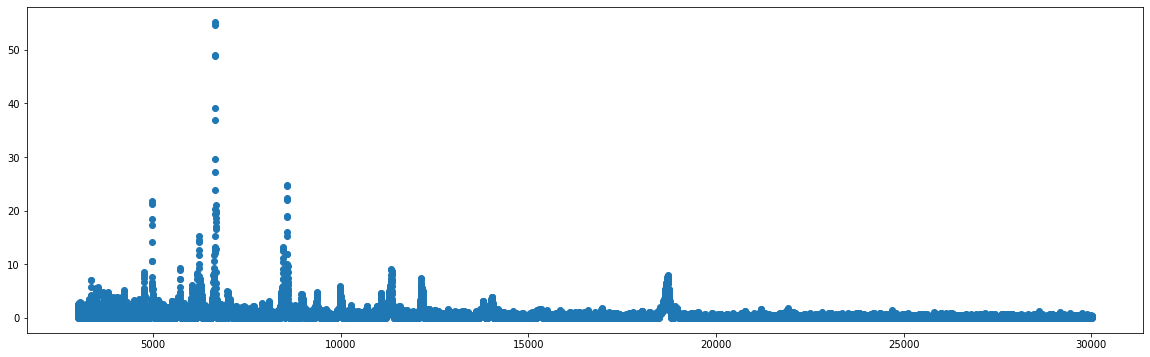

In [14]:
plt.figure(figsize=(20, 6))
plt.scatter(imze.mzValues, spectra[40,80])

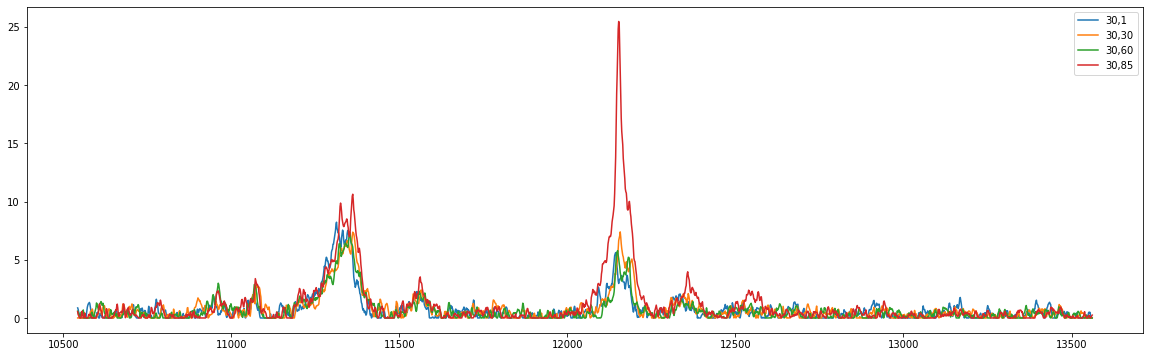

In [145]:
plt.figure(figsize=(20, 6))
mzvals = imze.mzValues[5000:7000]
plt.plot(mzvals, spec.region_array[30,1][5000:7000], label="30,1")
plt.plot(mzvals, spec.region_array[30,30][5000:7000],label="30,30")
plt.plot(mzvals, spec.region_array[30,60][5000:7000],label="30,60")
plt.plot(mzvals, spec.region_array[30,85][5000:7000],label="30,85")
plt.legend()

In [69]:
rstart = 4000
rend = 12000
maxshift = 20
refSpec = spec.region_array[30,1][rstart:rend]
reg1 = spec.region_array[30,30][rstart-maxshift:rend+maxshift]
print(len(refSpec))

8000


In [44]:
def cos_similarity(vA, vB):
    assert(len(vA) == len(vB))
    return np.dot(vA, vB) / (np.sqrt(np.dot(vA,vA)) * np.sqrt(np.dot(vB,vB)))

In [45]:
cos_similarity(refSpec, reg1[maxshift:-maxshift])

0.798574788692759

In [139]:
import progressbar

def findBestShift( refspectrum, allspectra, maxshift ):
    idx2shift = {}
    idx2shifted = {}
    
    bar = progressbar.ProgressBar()
    
    for idx, aspec in enumerate(bar(allspectra)):
        
        bestsim = 0
        bestshift = -maxshift
        
        for ishift in range(-maxshift, maxshift, 1):
            shifted = aspec[maxshift+ishift:-maxshift+ishift]
            newsim = cos_similarity(refspectrum, shifted)
            
            if newsim > bestsim:
                bestsim = newsim
                bestshift = ishift
                
        idx2shift[idx] = bestshift
        idx2shifted[idx] = aspec[maxshift+bestshift:-maxshift+bestshift]
        
    return idx2shift, idx2shifted
            


In [81]:
for i in progressbar(range(10)):
        time.sleep(0.1)

TypeError: 'module' object is not callable

In [88]:
i2s, i2sp = findBestShift(spec.region_array[30,1][rstart:rend],
              [
                  spec.region_array[30,30][rstart-maxshift:rend+maxshift],
                  spec.region_array[30,60][rstart-maxshift:rend+maxshift],
                  spec.region_array[30,90][rstart-maxshift:rend+maxshift]
              ])

100% |########################################################################|


In [140]:
def shift_region_array(reg_array, masses, maxshift, ref_coord=(0,0)):
       
    ref_spec = reg_array[ref_coord[0], ref_coord[1], maxshift:-maxshift]
    outarray = np.zeros((reg_array.shape[0], reg_array.shape[1], len(ref_spec)))
    
    idx2coord = {}
    coord2idx = {}
    specs = []
    
    for i in range(0, reg_array.shape[0]):
        for j in range(0, reg_array.shape[1]):
            
            idx2coord[len(specs)] = (i,j)
            coord2idx[(i,j)] = len(specs)
            specs.append(reg_array[i,j,:])
            
    i2s, i2sp = findBestShift(ref_spec, specs, maxshift)
    
    for idx in i2sp:
        idxcoords = idx2coord[idx]
        shspec = i2sp[idx]
        outarray[idxcoords[0], idxcoords[1],] = shspec
        
    return outarray, masses[maxshift:-maxshift]
    

In [141]:
sh_array, sh_masses = shift_region_array(spectra, imze.mzValues, 40)

100% |########################################################################|


4902.3215154806085 1
5645.188162410194 1
6161.571075519784 7
6163.080967078584 631
6164.590858637384 440
6212.907388518983 1
6214.417280077783 86
6215.927171636583 22
6585.850603542576 6
6587.360495101376 3025
6588.870386660175 1688
8362.99296825014 1
12078.836094456869 1
12080.345986015669 3
12081.855877574468 3


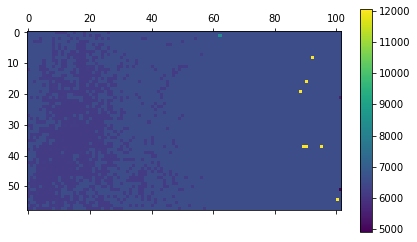

5916 14.950656377960454 74.2484203426622 37.91779273550781


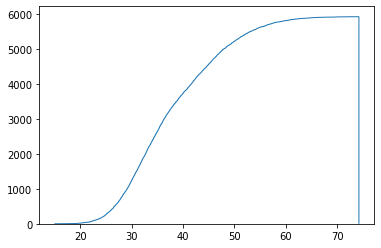

In [142]:
imze.list_highest_peaks(sh_array, counter=True)

In [143]:
spec_sh = SpectraRegion(sh_array, sh_masses)

In [ ]:
def calc_dot_sim( mat ):
    
    elems = mat.shape[0]*mat.shape[1]
    
    result = np.zeros((elems, elems))
    
    for i in range(0, mat.shape[0]):
        for j in range(0, mat.shape[1]):
            idxI = i*mat.shape[1] + j
            
            for k in range(0, mat.shape[0]):
                for l in range(0, mat.shape[1]):
                    idxJ = k*mat.shape[1] + l
            
                    result[idxI, idxJ] = cos_similarity(mat[i,j,:], mat[k,j,:])
            
            

In [144]:
spec_sh.calculate_similarity(mode="spectra_log")

(58, 102, 17820)


2020-06-25 18:04:50,394  SpectraRegion  INFO: Creating C++ obj
2020-06-25 18:04:50,394  SpectraRegion  INFO: Creating C++ obj
2020-06-25 18:04:50,394  SpectraRegion  INFO: Creating C++ obj
2020-06-25 18:04:50,394  SpectraRegion  INFO: Creating C++ obj
2020-06-25 18:04:50,394  SpectraRegion  INFO: Creating C++ obj
I0625 18:04:50.394241 139671011854144 segment.py:431] Creating C++ obj
2020-06-25 18:04:50,398  SpectraRegion  INFO: dimensions 17820
2020-06-25 18:04:50,398  SpectraRegion  INFO: dimensions 17820
2020-06-25 18:04:50,398  SpectraRegion  INFO: dimensions 17820
2020-06-25 18:04:50,398  SpectraRegion  INFO: dimensions 17820
2020-06-25 18:04:50,398  SpectraRegion  INFO: dimensions 17820
I0625 18:04:50.398607 139671011854144 segment.py:441] dimensions 17820
2020-06-25 18:04:50,405  SpectraRegion  INFO: input dimensions (58, 102, 17820)
2020-06-25 18:04:50,405  SpectraRegion  INFO: input dimensions (58, 102, 17820)
2020-06-25 18:04:50,405  SpectraRegion  INFO: input dimensions (58, 

(5916, 5916)


2020-06-25 18:22:16,557  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-25 18:22:16,557  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-25 18:22:16,557  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-25 18:22:16,557  SpectraRegion  INFO: Calculating spectra similarity done
2020-06-25 18:22:16,557  SpectraRegion  INFO: Calculating spectra similarity done
I0625 18:22:16.557405 139671011854144 segment.py:487] Calculating spectra similarity done


array([[1.        , 0.96920335, 0.96020716, ..., 0.8389902 , 0.8631025 ,
        0.8487194 ],
       [0.96920335, 1.        , 0.95749336, ..., 0.8353276 , 0.8642988 ,
        0.8440169 ],
       [0.96020716, 0.95749336, 1.        , ..., 0.8240171 , 0.8625168 ,
        0.8464034 ],
       ...,
       [0.8389902 , 0.8353276 , 0.8240171 , ..., 1.        , 0.96359366,
        0.9618213 ],
       [0.8631025 , 0.8642988 , 0.8625168 , ..., 0.96359366, 1.        ,
        0.9694459 ],
       [0.8487194 , 0.8440169 , 0.8464034 , ..., 0.9618213 , 0.9694459 ,
        1.        ]], dtype=float32)

In [134]:
spec_sh.segment(method="WARD", number_of_regions=15)

2020-06-25 18:01:44,405  SpectraRegion  INFO: Calculating clusters
2020-06-25 18:01:44,405  SpectraRegion  INFO: Calculating clusters
2020-06-25 18:01:44,405  SpectraRegion  INFO: Calculating clusters
2020-06-25 18:01:44,405  SpectraRegion  INFO: Calculating clusters
I0625 18:01:44.405952 139671011854144 segment.py:651] Calculating clusters
2020-06-25 18:01:46,561  SpectraRegion  INFO: Calculating clusters done
2020-06-25 18:01:46,561  SpectraRegion  INFO: Calculating clusters done
2020-06-25 18:01:46,561  SpectraRegion  INFO: Calculating clusters done
2020-06-25 18:01:46,561  SpectraRegion  INFO: Calculating clusters done
I0625 18:01:46.561666 139671011854144 segment.py:666] Calculating clusters done
2020-06-25 18:01:46,617  SpectraRegion  INFO: Calculating clusters saved
2020-06-25 18:01:46,617  SpectraRegion  INFO: Calculating clusters saved
2020-06-25 18:01:46,617  SpectraRegion  INFO: Calculating clusters saved
2020-06-25 18:01:46,617  SpectraRegion  INFO: Calculating clusters sav

array([[ 5,  5,  5, ...,  2,  1,  1],
       [ 5,  5,  5, ...,  1,  1,  1],
       [ 5,  5,  5, ...,  4,  1, 10],
       ...,
       [ 6,  6,  5, ...,  4,  3,  3],
       [ 6,  6,  6, ...,  4,  4,  4],
       [ 6,  6,  6, ...,  4,  4,  4]], dtype=int16)

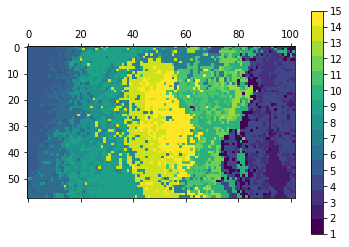

In [135]:
spec_sh.plot_segments()

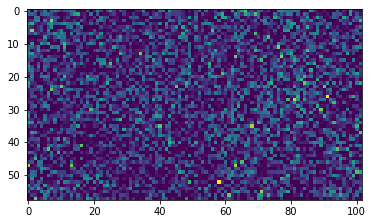

In [136]:
plt.imshow(sh_array[:,:,100])

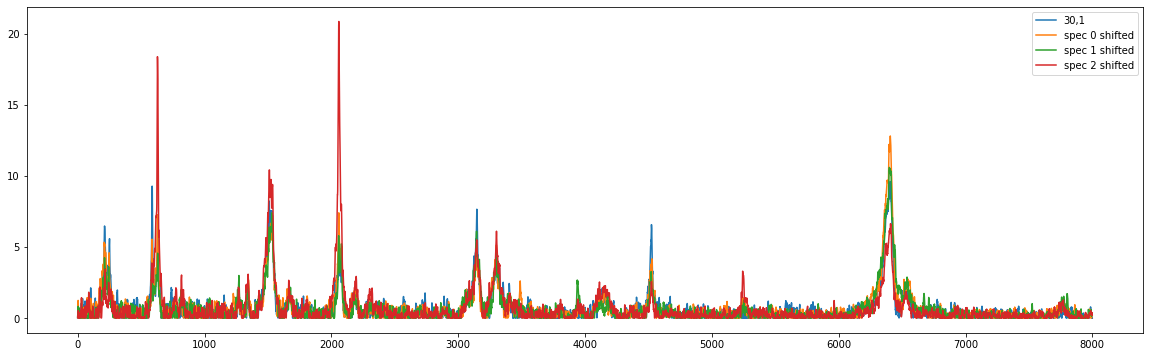

In [72]:
plt.figure(figsize=(20, 6))
mzvals = range(0,len(refSpec))
plt.plot(mzvals, refSpec, label="30,1")

for idx in i2sp:
    plt.plot(mzvals, i2sp[idx], label="spec {} shifted".format(idx))


plt.legend()

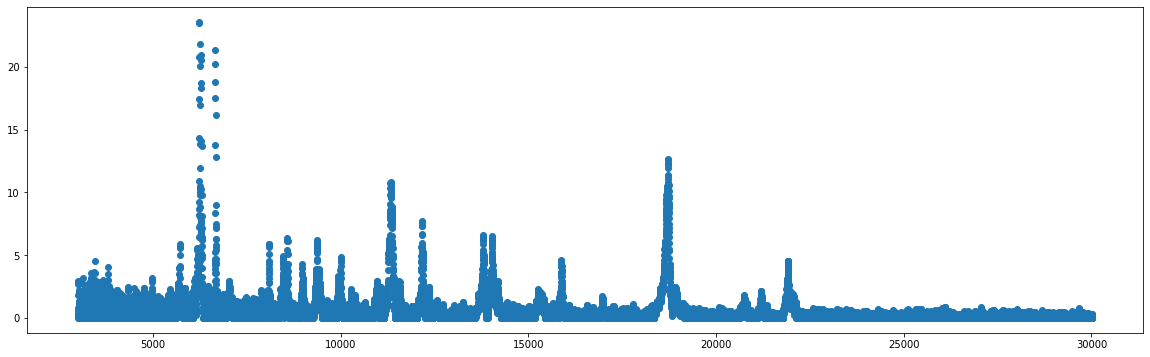

In [17]:
plt.figure(figsize=(20, 6))
plt.scatter(imze.mzValues, spec.region_array[40,40])

In [18]:
spec32, spec32Idx, origCoords = imze.get_pixel_spectrum(2, (3,2))

In [19]:
spec32Idx, origCoords

(25961, (693, 317, 1))

In [20]:
ridx = imze.get_region_index_array(2)

Found region 2 with shape (58, 102, 17900)
I0625 10:01:30.811232 139671011854144 segment.py:2206] Found region 2 with shape (58, 102, 17900)


In [21]:
ridx[0:5,0:5]

array([[27150., 26008., 25955., 26118., 26100.],
       [27151., 26003., 25959., 26119., 26101.],
       [27132., 26004., 25960., 26136., 26096.],
       [27133., 26005., 25961., 26153., 26097.],
       [27134., 26009., 25956., 26154., 26098.]], dtype=float32)

In [22]:
[x for x in imze.parser.coordinates if x[0] == 693 and x[1] == 317]

[(693, 317, 1)]

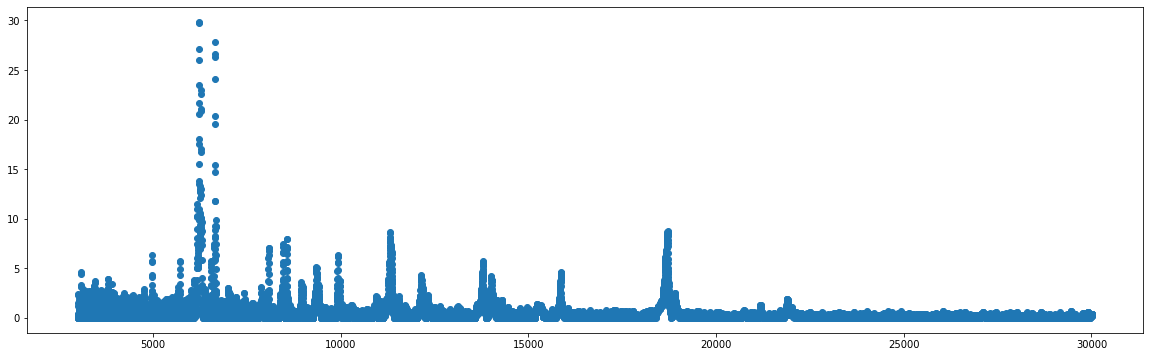

In [23]:
plt.figure(figsize=(20, 6))
plt.scatter(imze.mzValues, spec32)

In [24]:
spec.calculate_similarity(mode="spectra_log_dist")

(58, 102, 17900)


2020-06-25 10:01:49,191  SpectraRegion  INFO: Creating C++ obj
I0625 10:01:49.191900 139671011854144 segment.py:431] Creating C++ obj
2020-06-25 10:01:49,194  SpectraRegion  INFO: dimensions 17900
I0625 10:01:49.194013 139671011854144 segment.py:441] dimensions 17900
2020-06-25 10:01:49,195  SpectraRegion  INFO: input dimensions (58, 102, 17900)
I0625 10:01:49.195646 139671011854144 segment.py:442] input dimensions (58, 102, 17900)
2020-06-25 10:01:49,198  SpectraRegion  INFO: Switching to dot mode
I0625 10:01:49.198811 139671011854144 segment.py:445] Switching to dot mode
2020-06-25 10:01:49,200  SpectraRegion  INFO: Starting calc similarity c++
I0625 10:01:49.200610 139671011854144 segment.py:449] Starting calc similarity c++
2020-06-25 10:17:38,286  SpectraRegion  INFO: outclust dimensions (5916, 5916)
I0625 10:17:38.286796 139671011854144 segment.py:454] outclust dimensions (5916, 5916)
2020-06-25 10:17:38,336  SpectraRegion  INFO: Calculating spectra similarity
I0625 10:17:38.3362

(5916, 5916)


2020-06-25 10:17:39,137  SpectraRegion  INFO: Calculating spectra similarity done
I0625 10:17:39.137746 139671011854144 segment.py:487] Calculating spectra similarity done
2020-06-25 10:17:39,139  SpectraRegion  INFO: Calculating dist pixel map
I0625 10:17:39.139598 139671011854144 segment.py:494] Calculating dist pixel map
2020-06-25 10:22:24,813  SpectraRegion  INFO: Calculating dist pixel map done
I0625 10:22:24.813262 139671011854144 segment.py:504] Calculating dist pixel map done


array([[0.94999999, 0.90833975, 0.88168188, ..., 0.71656817, 0.73638482,
        0.7219659 ],
       [0.90833975, 0.94999999, 0.90985311, ..., 0.74330851, 0.76401638,
        0.74975468],
       [0.88168188, 0.90985311, 0.94999999, ..., 0.76771766, 0.79600748,
        0.78040253],
       ...,
       [0.71656817, 0.74330851, 0.76771766, ..., 0.94999999, 0.91538943,
        0.91374417],
       [0.73638482, 0.76401638, 0.79600748, ..., 0.91538943, 0.94999999,
        0.9210387 ],
       [0.7219659 , 0.74975468, 0.78040253, ..., 0.91374417, 0.9210387 ,
        0.94999999]])

In [25]:
spec.segment(method="WARD", number_of_regions=15)

2020-06-25 10:22:25,603  SpectraRegion  INFO: Calculating clusters
I0625 10:22:25.603322 139671011854144 segment.py:651] Calculating clusters
2020-06-25 10:22:27,848  SpectraRegion  INFO: Calculating clusters done
I0625 10:22:27.848916 139671011854144 segment.py:666] Calculating clusters done
2020-06-25 10:22:27,892  SpectraRegion  INFO: Calculating clusters saved
I0625 10:22:27.892347 139671011854144 segment.py:684] Calculating clusters saved


array([[4, 4, 4, ..., 3, 3, 3],
       [4, 4, 4, ..., 2, 2, 2],
       [4, 4, 4, ..., 2, 3, 3],
       ...,
       [4, 4, 4, ..., 1, 1, 1],
       [4, 4, 4, ..., 2, 1, 2],
       [4, 4, 4, ..., 2, 1, 1]], dtype=int16)

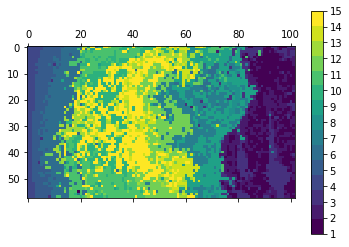

In [26]:
spec.plot_segments()